# Библиотеки для анализа данных (часть 1)

### Курс "Машинное обучение", программа Ozon Masters

Этот ноутбук посвящён знакомству с некоторыми библиотеками, которые широко используются в анализе данных: numpy, scipy и matplotlib.

В частности, в ноутбуке рассматриваются следующие темы:

* проблемы стандартных питоновских структур данных при матричных операциях
* базовые операции при работе с многомерными массивами в библиотеке numpy
* сложная индексация массиво и broadcasting 
* простейшая визуализация с помощью библиотеки matplitlib
* примеры работы с различными алгоритмами в библиотеке scipy

## Введение в Python

Чтобы подробнее ознакомиться с языком Python, просмотрите ноутбук **intro_to_python**. В этом ноутбуке мы напомним основные понятия, которые пригодятся на этом занятии.

#### Списки

Список из элементов в Python задаётся следующим образом:

In [1]:
my_list = [1, 2, 3, 4]

В список могут входить любые объекты:

In [2]:
pain_list = [13, 'боль', 'страдание', [13, 3.14]]

Сложение списков == список из элементов списков:

In [3]:
new_list = pain_list + my_list
new_list

[13, 'боль', 'страдание', [13, 3.14], 1, 2, 3, 4]

Умножение списка на целое число n == конкатенация n списков:

In [4]:
pain_list * 2

[13, 'боль', 'страдание', [13, 3.14], 13, 'боль', 'страдание', [13, 3.14]]

В Python все объекты делятся на 2 типа: изменяемые и неизменяемые. Все списки являются изменяемыми объектами, например, так можно добавить элементы в список:

In [5]:
my_list.append(5)

In [6]:
my_list

[1, 2, 3, 4, 5]

#### Кортежи

Кортеж — неизменяемый аналог списка, задаётся следующим образом:

In [7]:
pain_tuple = (13, 'боль', 'страдание', [13, 3.14])

In [8]:
pain_tuple.append(1)

AttributeError: 'tuple' object has no attribute 'append'

#### Циклы

Простой цикл for аналогичный циклам for в Си-подобрых языках записывается с помощью операторов for, in и функции range:


In [9]:
first_numbers_sum = 0
for i in range(10):
    first_numbers_sum += i
first_numbers_sum

45

В Python с помощью цикла for можно итерироваться по элементам списка:

In [10]:
for elem in pain_list:
    print(elem)

13
боль
страдание
[13, 3.14]



<font color='red'>**Задача 1.** Задайте матрицу `list_matrix` размером 500 на 10, в которой ij-ый элемент будет равен 10 * i + j. Не используйте библиотеку numpy! </font>

In [1]:
list_matrix = []
for i in range(500):
    new_row = []
    for j in range(10):
        new_row.append(10 * i + j)
    list_matrix.append(new_row)

Проверьте себя:

In [2]:
assert len(list_matrix) == 500
assert len(list_matrix[0]) == 10
assert list_matrix[10][3] == 103

## Проблемы списков при матричных операциях

Одна из проблем списков — отсутствие поэлементных и матричных операций.

Получим новую матрицу, равную `list_matrix`, умноженной на 2:

In [3]:
new_list_matrix = []

for x_vector in list_matrix:
    new_inner = []
    for xy_element in x_vector:
        new_inner.append(xy_element * 2)
    new_list_matrix.append(new_inner)

Измерим время выполнения с помощью магической команды %%timeit.

In [4]:
%%timeit 

new_list_matrix = []

for x_vector in list_matrix:
    new_inner = []
    for xy_element in x_vector:
        new_inner.append(xy_element * 2)
    new_list_matrix.append(new_inner)

721 µs ± 3.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


А теперь попробуем воспользоваться массивами из библиотеки numpy для аналогичных операций:

In [2]:
# from numpy import * -- НЕ ДЕЛАЙТЕ ТАК
import numpy as np

С помощью np.zeros зададим нулевой массив нужного размера. Заполним так же, как и list_matrix.

In [7]:
array_matrix = np.zeros((500, 10))

for i in range(500):
    for j in range(10):
        array_matrix[i][j] = j + 10*i
array_matrix[:5]

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]])

Все операции с numpy.ndarray по умолчанию поэлементные. Таким образом, умножение на два это всего лишь:

In [8]:
new_array_matrix = 2 * array_matrix

Измерим время выполнения:

In [9]:
%%timeit

new_array_matrix = 2 * array_matrix

4.55 µs ± 21.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Если вы всё реализовали правильно, то должно получиться быстрее больше чем в 100 раз...

## Базовые операции

### Создание массивов

Ещё раз обсудим создание массивов. Создание нулевого вектора:

In [16]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

**Внимание**. Если размерность массива > 1, размер подаётся в функцию инициализации через кортеж, а не отдельными аргументами!

Так правильно:

In [17]:
np.zeros((5, 7))

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

Так неправильно:

In [18]:
np.zeros(5, 7)

TypeError: data type not understood

Массив из единиц:

In [19]:
np.ones((1, 3))

array([[1., 1., 1.]])

Создание массива последовательных чисел:

In [20]:
# похоже на range, но все числа хранятся в памяти
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Создание массива из Python-объекта:

In [21]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

Вывести размер полученного массива можно с помощью метода shape:

In [22]:
x.shape

(2, 3)

<font color='red'>**Задача 2.** Задайте массив `result` размером 50 на 30, состоящий из троек.</font>

In [16]:
result = np.zeros((50, 30)) + 3

Проверьте себя:

In [17]:
assert result.shape == (50, 30)
assert np.all(result == 3)

<font color='red'>**Задача 3.** Какая размерность будет у массива, полученного с помощью команды `np.array([[1], [2]])`?</font>

In [ ]:
## your answer here

### Поэлементные операции

In [23]:
x = np.arange(10)
y = np.arange(5, 15)

Поэлементные арифметическии операции:

In [24]:
x + y

array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [25]:
x * y

array([  0,   6,  14,  24,  36,  50,  66,  84, 104, 126])

In [26]:
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

Поэлементые операции сравнения:

In [27]:
x > 5

array([False, False, False, False, False, False,  True,  True,  True,
        True])

### Агрегирующие операции

Агрегация булевого массива
* all — все элементы удовлетворяют требованию
* any — хотя бы один элемент удовлетворяет требованию

In [28]:
np.all(x > 5)

False

In [29]:
np.any(x > 5)

True

Нахождение максимума в массиве:

In [30]:
np.max(y)

14

Нахождение позиции максимума:

In [31]:
np.argmax(y)

9

Суммирование всех элементов:

In [32]:
np.sum(x)

45

У многих функций в numpy есть "аналогичный" по принципу работы метод: 

In [33]:
x.sum()

45

In [34]:
y.argmax()

9

### Типы и преобразование типов

Атрибут .dtype хранит информацию о типе массива:

In [35]:
x = np.arange(15)
x.dtype

dtype('int64')

In [36]:
y = np.array([1.5, 2.5])
y.dtype

dtype('float64')

Преобразование типов осуществляется с помощью метода .astype:

In [37]:
x = x.astype(np.float64)
x.dtype

dtype('float64')

## Размеры массивов

### Изменение размера массивов

NumPy массивы всегда лежат в памяти последовательно, одним куском. Поэтому у массива можно изменять размер практически бесплатно.

In [38]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
x.shape

(2, 3)

"Вытянуть" массив в вектор можно с помощью метода .ravel:

In [40]:
x = x.ravel()
x

array([1, 2, 3, 4, 5, 6])

Изменить размер массива можно с помощью метда .reshape:

In [41]:
new_x = x.reshape(2, 3)
new_x

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
new_x.shape

(2, 3)

In [43]:
x.shape

(6,)

Можно "не заполнять" одну размерность итогового массива, она заполнится автоматически:

In [44]:
x.reshape(2, -1)

array([[1, 2, 3],
       [4, 5, 6]])

**Это интересно.** Есть два распространённых способа упорядочить многомерный массив:
* C-order, **по умолчанию в NumPy**. Быстрее всего изменяется последний индекс. Для матриц — сначала идём по столбцам.
* Fortran-order (F-order). Быстрее всего изменяется первый индекс. Для матриц — сначала идём по строкам.

Порядок можно задать с помощью параметра `order` в методе reshape.

In [45]:
x.reshape(2, 3, order='F')

array([[1, 3, 5],
       [2, 4, 6]])

### Фиктивная размерность

Два способа добавить фиктивную размерность в массив:

In [46]:
x[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [47]:
x.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

Зачем нужно добавлять фиктивную размерность? Например, чтобы проводить различные операции с массивами неравного размера.

### Broadcasting

Подробное описание: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

Пусть нам дана матрица $X$ размером $10 \times 10$ и вектор $y$ длины 10. Пусть мы хотим прибавить вектор к каждой строке матрицы. 

In [48]:
x = np.arange(100).reshape(10, 10)
y = np.arange(10)

In [49]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [50]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Наивный способ решения проблемы будет работать правильно!

In [51]:
x + y

array([[  0,   2,   4,   6,   8,  10,  12,  14,  16,  18],
       [ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28],
       [ 20,  22,  24,  26,  28,  30,  32,  34,  36,  38],
       [ 30,  32,  34,  36,  38,  40,  42,  44,  46,  48],
       [ 40,  42,  44,  46,  48,  50,  52,  54,  56,  58],
       [ 50,  52,  54,  56,  58,  60,  62,  64,  66,  68],
       [ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78],
       [ 70,  72,  74,  76,  78,  80,  82,  84,  86,  88],
       [ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98],
       [ 90,  92,  94,  96,  98, 100, 102, 104, 106, 108]])

**Почему?** Правила broadcasting (приведение размеров).

1. Если два массива имеют размерности (a_1, a_2 .. a_n) и (b_1, b_2 .. b_n) соответственно, то между ними можно проводить поэлементные операции, если для каждого i выполнено одно из трёх условий:
    * a_i = b_i
    * a_i = 1
    * b_i = 1
    
2. Если поэлементная операция выполняется между массивами разного размера, то к массиву меньшего размера добавляются ведущие фиктивные размерности.

<font color='red'>**Задача 4.** Какие из этих команд будут выполняться с ошибкой?</font>

1. `np.ones((2, 3)) + np.ones(3)`

2. `np.ones(2) + np.ones((2, 3))`

3. `np.zeros((4, 3)) + np.ones((4, 1))`

4. `np.zeros((3, 4)) + np.ones((4, 3))`

5. `np.zeros((1, 3, 5)) + np.zeros((1, 3))`

6. `np.zeros((5, 3, 1)) + np.zeros((1, 5))`

In [ ]:
## your answer here

<font color='red'>**Задача 5.** Пусть нам дана матрица $X$ размером $10 \times 10$ и вектор-столбец $y$ длины 10. Получите матрицу result, полученную прибавлением к каждому столбцу $X$ вектора $y$ (без использования циклов). </font>

In [25]:
x = np.arange(100).reshape(10, 10)
y = np.arange(10).reshape(1,-1)

In [29]:
result = x + y
result

array([[  0,   2,   4,   6,   8,  10,  12,  14,  16,  18],
       [ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28],
       [ 20,  22,  24,  26,  28,  30,  32,  34,  36,  38],
       [ 30,  32,  34,  36,  38,  40,  42,  44,  46,  48],
       [ 40,  42,  44,  46,  48,  50,  52,  54,  56,  58],
       [ 50,  52,  54,  56,  58,  60,  62,  64,  66,  68],
       [ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78],
       [ 70,  72,  74,  76,  78,  80,  82,  84,  86,  88],
       [ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98],
       [ 90,  92,  94,  96,  98, 100, 102, 104, 106, 108]])

Проверьте себя:

In [30]:
assert result[0][0] == 0
for i in range(1, 10):
    assert result[i][i] == 10 * i + (i - 1) * 2 + 1

AssertionError: 

## Матричные операции

In [31]:
x = np.array([[1, 2], [2, 1], [2, 3]])
x

array([[1, 2],
       [2, 1],
       [2, 3]])

Транспонирование:

In [32]:
x.T

array([[1, 2, 2],
       [2, 1, 3]])

Матричное умножение:

In [33]:
y = np.array([[0, 1, 0], [1, 0, 1]])

In [34]:
res = np.dot(x, y)
res

array([[2, 1, 2],
       [1, 2, 1],
       [3, 2, 3]])

### Операции с размерностями

Некоторые из операций можно принять вдоль некоторых размерностей.

Максимум в каждом столбцe (первая размерность, axis=0):

In [56]:
res

array([[2, 1, 2],
       [1, 2, 1],
       [3, 2, 3]])

In [35]:
np.amax(res, axis=1)

array([2, 2, 3])

In [36]:
res.sum(axis=0)

array([6, 5, 6])

Как легко запомнить, как работает axis:
* после применения функции получится массив, в котором будет отсутствовать размерность указанная в axis, но остальные размерности будут иметь такие же значения

<font color='red'>**Задача 6.** Дан вектор $x$ и квадратная матрица $A$. Вычислить вектор значений $y_j = argmin_i (x_i + A_{ij})$. </font>

In [3]:
x = np.array([5, 2, 3, 1])
A = np.array([
    [1, 2, 3],
    [2, 2, 4],
    [5, 6, 1],
    [2, 4, 5]
])

In [6]:
x[:]

array([5, 2, 3, 1])

In [8]:
A + x[:]

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [45]:
y = np.argmin(A + x[:,np.newaxis],axis = 0)

Проверьте себя:

In [46]:
assert y.tolist() == [3, 1, 2]

### Конкатенация матриц

In [60]:
x = np.array([[1, 2], [5, 6]])
y = np.array([[3, 4], [2, 3]])

Конкатенация матриц по горизонтали:

In [61]:
np.hstack((x, y))

array([[1, 2, 3, 4],
       [5, 6, 2, 3]])

Конкатенация матриц по вертикали:

In [62]:
np.vstack((x, y))

array([[1, 2],
       [5, 6],
       [3, 4],
       [2, 3]])

### Логические маски

Использование масок:

In [48]:
x = np.array([1, 0, 2, 1])

In [49]:
mask = x == 1
mask

array([ True, False, False,  True])

С помощью булевых масок можно выбирать соответствующие элементы массива и даже изменять их:

In [50]:
x[mask]

array([1, 1])

In [51]:
x[mask] = -1
x

array([-1,  0,  2, -1])

С булевыми массивами можно делать побитовые операции с помощью операндов &, |.

С помощью оператора where, можно находить индексы элементов, заданные маской:

In [52]:
np.where(x > 0)

(array([2]),)

<font color='red'> **Задача 7.** Даны два вектора одинаковой длины: a и b. Оставить в этих векторах только те элементы, которые соответствуют позициям ненулевых элементов в обоих векторах. </font>

In [54]:
a = np.array([0, 1, 0, 2, 3])
b = np.array([1, 5, 2, 0, 6])

In [55]:
mask_a = (a > 0)
mask_b = (b > 0)
mask = mask_a & mask_b
a = a[mask]
b = b[mask]


array([5, 6])

Проверьте себя:

In [56]:
assert a.tolist() == [1, 3]
assert b.tolist() == [5, 6]

## Индексация

Подробное описание: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [69]:
x = np.arange(20).reshape(4, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Простая индексация:

In [70]:
x[1]

array([5, 6, 7, 8, 9])

Для массивов можно делать slicing, как и для списков. По каждой размерности может быть свой slice.

x[0] эквивалентно x[0, :], то есть недостающие индексы заменяются на :

In [71]:
x[0:3, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14]])

**Это интересно.** Важное отличие от питоновских списков: при slicing возвращается **view**, а не копия! Это позволяет присваивать значения подматрицам.

#### Сложная индексация

По каждой размерности подаются массивы одинаковых размеров, элементы которых соответствуют индексам каждой размерности. Тогда, на выходе будет массив размера этих массивов, элементы которого будут соответствовать элементам исходного массива, взятых в точках, соответствующих поданным массивам.

In [72]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [73]:
X[[0, 1], [1, 2]]

array([2, 6])

In [74]:
X[[0, 0], [1, 0]]

array([2, 1])

## View и копирование

In [75]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
y = x
y.shape = (2, 5)
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

View ссылается на те же данные, но позволяет задать другие размерности массива.

In [77]:
x = np.arange(10)
v = x.view()
v.shape = (2, 5)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
v[0, 0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

Если нужно получить копию массива, чтобы не портить переданные данные, пользуйтесь функцией copy()

In [79]:
x = np.arange(10)
y = x.copy()
y[:] = 0
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Визуализация с помощью библиотеки matplotlib

При работе с данными бывает полезно их визуализировать. Стандартная библиотека для визуализации — matplotlib. В jupyter notebook доступна специальная команда %matplotlib inline, позволяющая отображать графики прямо внутри ноутбука.

Более подробную информацию о библиотеке matplotlib можно получить здесь:
http://nbviewer.jupyter.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1%20Chapter%201%20Pyplot.ipynb

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

### Немного об устройстве библиотеки

Библиотека matplotlib - это бибилиотека двумерной графики для языка программирования python с помощью которой можно создавать высококачественные рисунки различных форматов.

Matplotlib cостоит из множества модулей. Модули наполнены различными классами и функциями, которые иерархически связаны между собой. matplotlib.pyplot предоставляет достоп к высокоуровневым интерфейсам.

Главной единицей (объектом самого высокого уровня) при работе с matplotlib является рисунок (Figure). Любой рисунок в matplotlib имеет вложенную структуру и чем-то напоминает матрёшку. Пользовательская работа подразумевает операции с разными уровнями этой матрёшки:

    Figure(Рисунок) -> Axes(Область рисования) -> Axis(Координатная ось)

* Рисунок (Figure) — объект самого верхнего уровня, на котором располагаются одна или несколько областей рисования (Axes), элементы рисунка Artisits (заголовки, легенда и т.д.) и основа-холст (Canvas). 

* Область рисования (Axes) — объект среднего уровня, главный объект работы с графикой. Это часть изображения с пространством данных. Каждая область рисования Axes содержит две (или три в случае трёхмерных данных) координатных оси (Axis объектов), которые упорядочивают отображение данных.

* Координатная ось (Axis) — объект среднего уровня, который определяет область изменения данных, на ось наносятся деления ticks и подписи к делениям ticklabels. 

* Элементы рисунка (Artists) — всё (почти), что отображается на рисунке является элементом рисунка (Artist). Элементы рисунка Artists включают в себя такие простые объекты как текст (Text), плоская линия (Line2D), фигура (Patch) и другие.

Рисунки в matplotlib создаются путём последовательного вызова команд: либо в интерактивном режиме (в консоли), либо в скрипте (текстовый файл с python-кодом). Графические элементы (точки, линии, фигуры и т.д.) наслаиваются одна на другую последовательно. При этом последующие перекрывают предыдущие, если они занимают общее участки на рисунке (регулируется параметром zorder).

В matplotlib работает правило "текущей области" ("current axes"), которое означает, что все графические элементы наносятся на текущую область рисования. Несмотря на то, что областей рисования может быть несколько, одна из них всегда является текущей.

### Пример графика

Попробуем изобразить функции $\sin(x)$ и $1 - \sin(x)$ на отрезке $[-5, 5]$.

In [58]:
x_values = np.array([x for x in np.linspace(-5, 5, 100)])
y_values = np.array([np.sin(x) for x in x_values])
invert_y_values = 1 - y_values

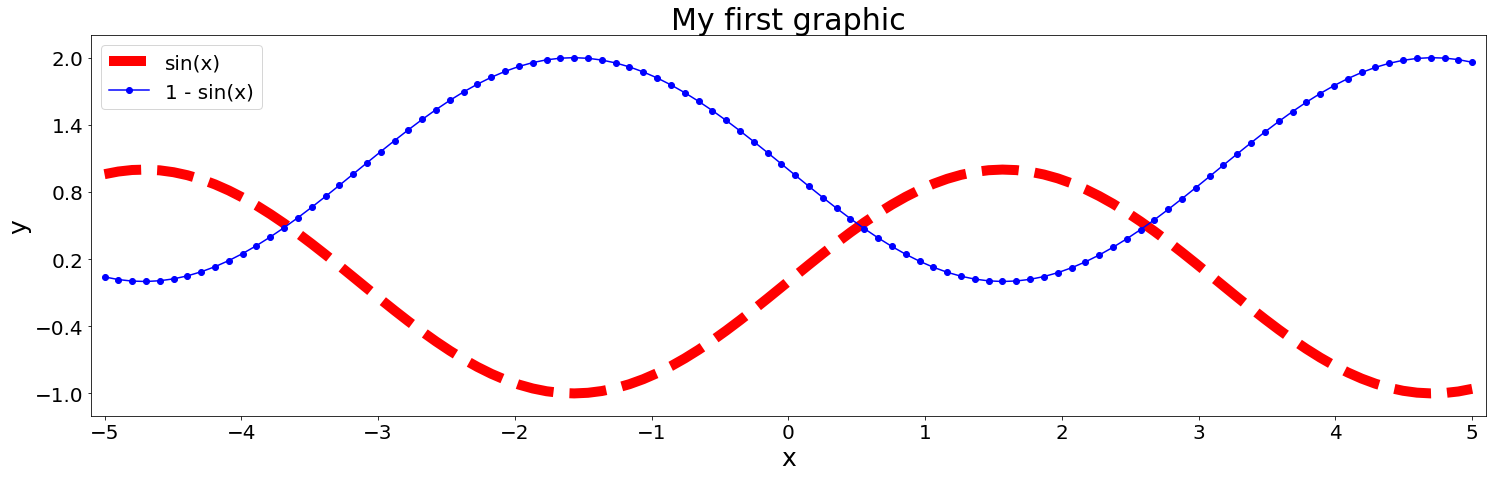

In [59]:
# создадим окружение
fig, ax = plt.subplots()

# зададим размеры рисунка
fig.set_figwidth(25)
fig.set_figheight(7)

# заголовок рисунка
plt.title('My first graphic', fontsize=30)

# добавим линии
plt.plot(x_values, y_values, 'r--', linewidth=10)
plt.plot(x_values, 1 - y_values, 'b-o')

# установить разметку осей
plt.xticks(np.linspace(-5, 5, 11), fontsize=20)
plt.yticks(np.linspace(-1, 2, 6), fontsize=20)

# установить границы осей
plt.xlim(-5.1, 5.1)
plt.ylim(-1.2, 2.2)

# подпишем оси
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)


# легенда
plt.legend(['sin(x)', '1 - sin(x)'], loc=2, fontsize=20)

# сохранить
#plt.savefig('fig.pdf')

## Библиотека Scipy

Sсipy — библиотека для сложных научных вычислений в Python, интегрированная с numpy.
В частности, Scipy включает в себя:

* Операции линейной алгебры (scipy.linalg)
* Реализации методов оптимизации (scipy.optimize)
* Статистические критерии и сложные распределения (scipy.stats) 
* Функции для численного интегрирования (scipy.integrate)

**Важно.** Некоторые из операций есть как в numpy, так и в scipy.

**Важно.** Scipy — более тяжеловесен чем numpy, т.к. использует внутри себя процедуры языка Fortran.

Более подробный обзор библиотеки можно получить здесь:
http://scipy-lectures.org/intro/scipy.html

### SVD разложение с помощью Scipy

In [83]:
from scipy.linalg import svd

In [84]:
A = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [85]:
U, s, Vh = svd(A, full_matrices=True)

In [86]:
A_from_svd = U.dot(np.diag(s)).dot(Vh)

In [87]:
A - A_from_svd

array([[-8.52626853e-16, -3.99680289e-15, -3.55271368e-15],
       [ 0.00000000e+00, -1.77635684e-15, -8.88178420e-16],
       [-8.88178420e-16, -4.44089210e-15, -3.55271368e-15]])

### Интерполяция

In [88]:
from scipy.optimize import curve_fit

In [89]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

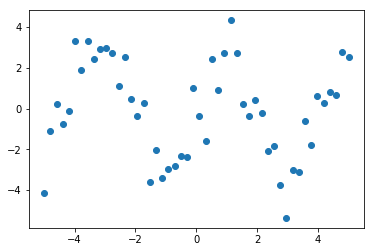

In [90]:
plt.plot(x_data, y_data, 'o')

In [91]:
def fitting_function(x, a, b):
    return a * np.sin(b * x)

In [92]:
params, params_covariance = curve_fit(fitting_function, x_data, y_data)

In [93]:
print(params)

[2.9350029  1.50382482]


In [94]:
curve_y_data = [fitting_function(x, *params) for x in x_data]

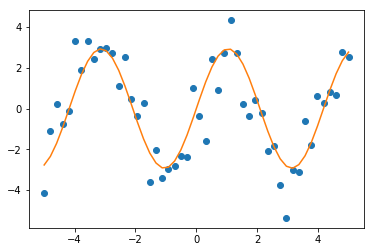

In [95]:
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, curve_y_data)

## Разные задачи

<font color='red'> **Задача 8.** Дана матрица размерности $N \times K$, $N$ - число объектов, $K$ - число признаков.
Подсчитать выборочное среднее и ковариационную матрицу без использования
функций mean и cov.

$$ E[X]={\frac {1}{n}}\sum \limits _{i=1}^{n}x_{i} $$

$$ {\mathrm  {cov}}(X_{{(n)}},Y_{{(n)}})={\frac  1n}\sum _{{t=1}}^{n}\left(X_{t}-\overline {X}\right)\left(Y_{t}-\overline {Y}\right)$$

 </font>

In [72]:
X = np.arange(32).reshape(8, 4)

In [77]:
mean = X.sum(axis=0) / X.shape[0]
cov = (X - mean).dot((X - mean).T) / X.shape[0]
print(mean)
print(cov)

[14. 15. 16. 17.]
[[ 98.  70.  42.  14. -14. -42. -70. -98.]
 [ 70.  50.  30.  10. -10. -30. -50. -70.]
 [ 42.  30.  18.   6.  -6. -18. -30. -42.]
 [ 14.  10.   6.   2.  -2.  -6. -10. -14.]
 [-14. -10.  -6.  -2.   2.   6.  10.  14.]
 [-42. -30. -18.  -6.   6.  18.  30.  42.]
 [-70. -50. -30. -10.  10.  30.  50.  70.]
 [-98. -70. -42. -14.  14.  42.  70.  98.]]


Проверьте себя:

In [74]:
assert mean.tolist() == [14, 15, 16, 17]
assert np.all(cov == 84)

AssertionError: 

<font color='red'> **Задача 9.** Даны матрицы $A$ размера $(n \times d)$ и $B$ размера $(m \times d)$. Найти в A все строки, содержащиеся в B, не используя циклы. </font>

In [97]:
A = np.array([
    [1, 2, 3],
    [1, 2, 1],
    [4, 5, 6],
    [1, 2, 1],
])

B = np.array([
    [4, 5, 6],
    [4, 5, 6],
    [1, 2, 3],
])

In [ ]:
## your code

Проверьте себя:

In [ ]:
assert set(indexes) == {0, 2}

<font color='red'> **Задача 10.** Замените все максимальные элементы матрицы $A$ на 0. </font>

In [98]:
A = np.array([
    [1, 6, 3],
    [6, 2, 1],
    [4, 5, 6],
    [1, 2, 1],
])

In [ ]:
## your code

In [ ]:
new_A = np.array([
    [1, 0, 3],
    [0, 2, 1],
    [4, 5, 0],
    [1, 2, 1],
])
assert np.all(A == new_A)